In [1]:
import numpy
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Avm_Customers.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


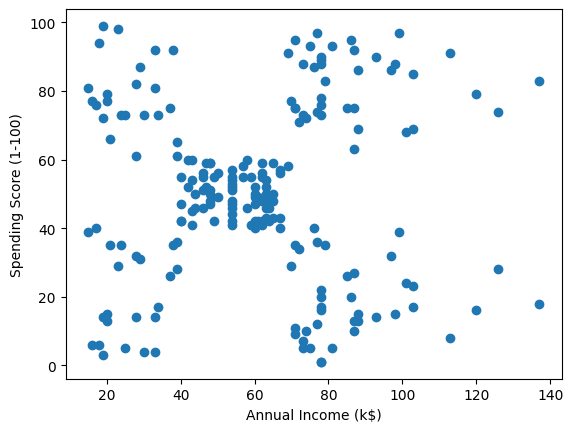

In [3]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Let's take a look at our dataset:

In [4]:
# Some column names are too long, let's shorten them:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

### We normalize the data before printing the data to the model

In [5]:
# In our last lesson, we did the normalization ourselves, this time it is available in the sklearn library. 
# We will use the MinMaxScaler() function:

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [6]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


### Let's Determine the K Value First (using the Elbow Method)

In [7]:
import warnings
warnings.filterwarnings('ignore')

k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

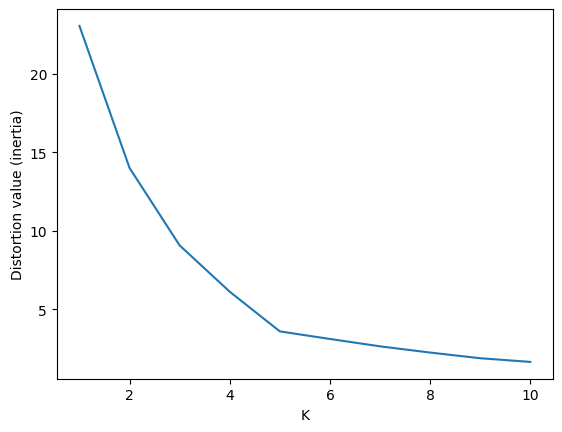

In [8]:
plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

#### Best K value = 5

In [9]:
# Let's create a K-Means model for K = 5:
my_kmeans_model = KMeans(n_clusters = 5)
y_predicted = my_kmeans_model.fit_predict(df[['income','score']])
y_predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [10]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,0
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,0
4,5,0.016393,0.397959,4


In [11]:
# Let's see the centroids:
my_kmeans_model.cluster_centers_   

array([[0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432]])

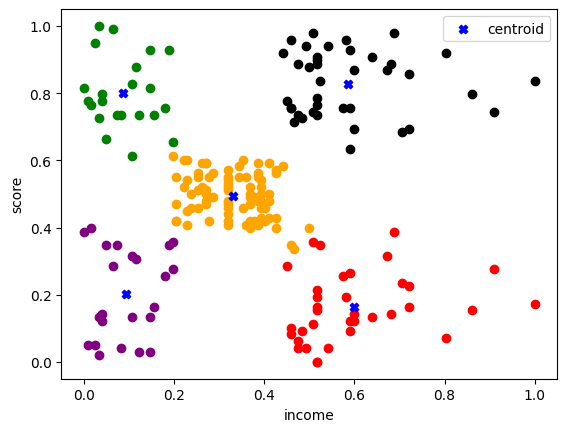

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



# my_kmeans_model.cluster_centers_ numpy Since it is a 2-dimensional array, use x and y columns as my_kmeans_model.cluster_centers_[:,0] 
#We get  and my_kmeans_model.cluster_centers_[:,1] for the scatter plot:
plt.scatter(my_kmeans_model.cluster_centers_[:,0], my_kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

